# Importing Libraries

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

# Loading Image

In [2]:
img_path = './images/exposed.JPG'
img_path

'./images/exposed.JPG'

In [3]:
rgb = plt.imread(img_path)

# HSV Color Conversion

In [4]:
lab = cv2.cvtColor(rgb, cv2.COLOR_RGB2LAB)

In [5]:
lab.shape

(1277, 850, 3)

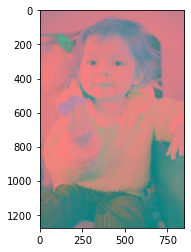

In [6]:
plt.imshow(lab)

In [8]:
L = lab[:, :, 0]
a = lab[:, :, 1]
b = lab[:, :, 2]

# Finding C

In [23]:
def C_VALUE(a,b):
    height, width = a.shape
    c_val = np.zeros(shape=(height, width), dtype = 'uint8')
    for x in range(height):
        for y in range(width): 
            c_val[x,y] = np.multiply(a[x,y], b[x,y])
    return np.transpose(c_val)
    

In [24]:
C = C_VALUE(a,b)

In [25]:
C.shape

(850, 1277)

In [10]:
L.shape

(1277, 850)

In [26]:
norm = LA.norm(C,1)


In [27]:
norm

164838.0

# Intensity Map Function

In [9]:
def intensity_map(R, G, B):
    height, width = R.shape
    intensity = np.zeros(shape=(height, width), dtype = 'uint8')
    for x in range(height):
        for y in range(width): 
            intensity[x,y] = max(R[x,y], G[x,y], B[x,y])
    return intensity
    

In [10]:
intensity = intensity_map(R,G,B)

# Saturation Map Function

In [11]:
def saturation_map(intensity, R, G, B):
    height, width = R.shape
    saturation = np.zeros(shape=(height, width), dtype = 'uint8')
    for x in range(height):
        for y in range(width): 
            if(intensity[x,y] > 0): 
                saturation[x,y] = ((intensity[x,y] - min(R[x,y], G[x,y], B[x,y])) / intensity[x,y])
            else:
                saturation[x,y] = 0
    return saturation

In [12]:
saturation = saturation_map(intensity, R, G, B)

# Contrast Map Function

In [13]:
#def contrast_map():

# Glare Image

In [14]:
#def glare_img(rgb, saturation, contrast):

# Showing Images

In [23]:
def plot_img(img_set, title_set):
    n = len(img_set)
    plt.figure(figsize = (40, 30))
    for i in range(n):
        img = img_set[i]
        ch = len(img.shape)

        plt.subplot(3, 2, i + 1)
        if (ch == 3):
            plt.imshow(img_set[i])
        else:
            plt.imshow(img_set[i])
            #plt.imshow(img_set[i], cmap='hsv')
        plt.title(title_set[i])
    #plt.savefig('./glare_Output.png')
    plt.show()

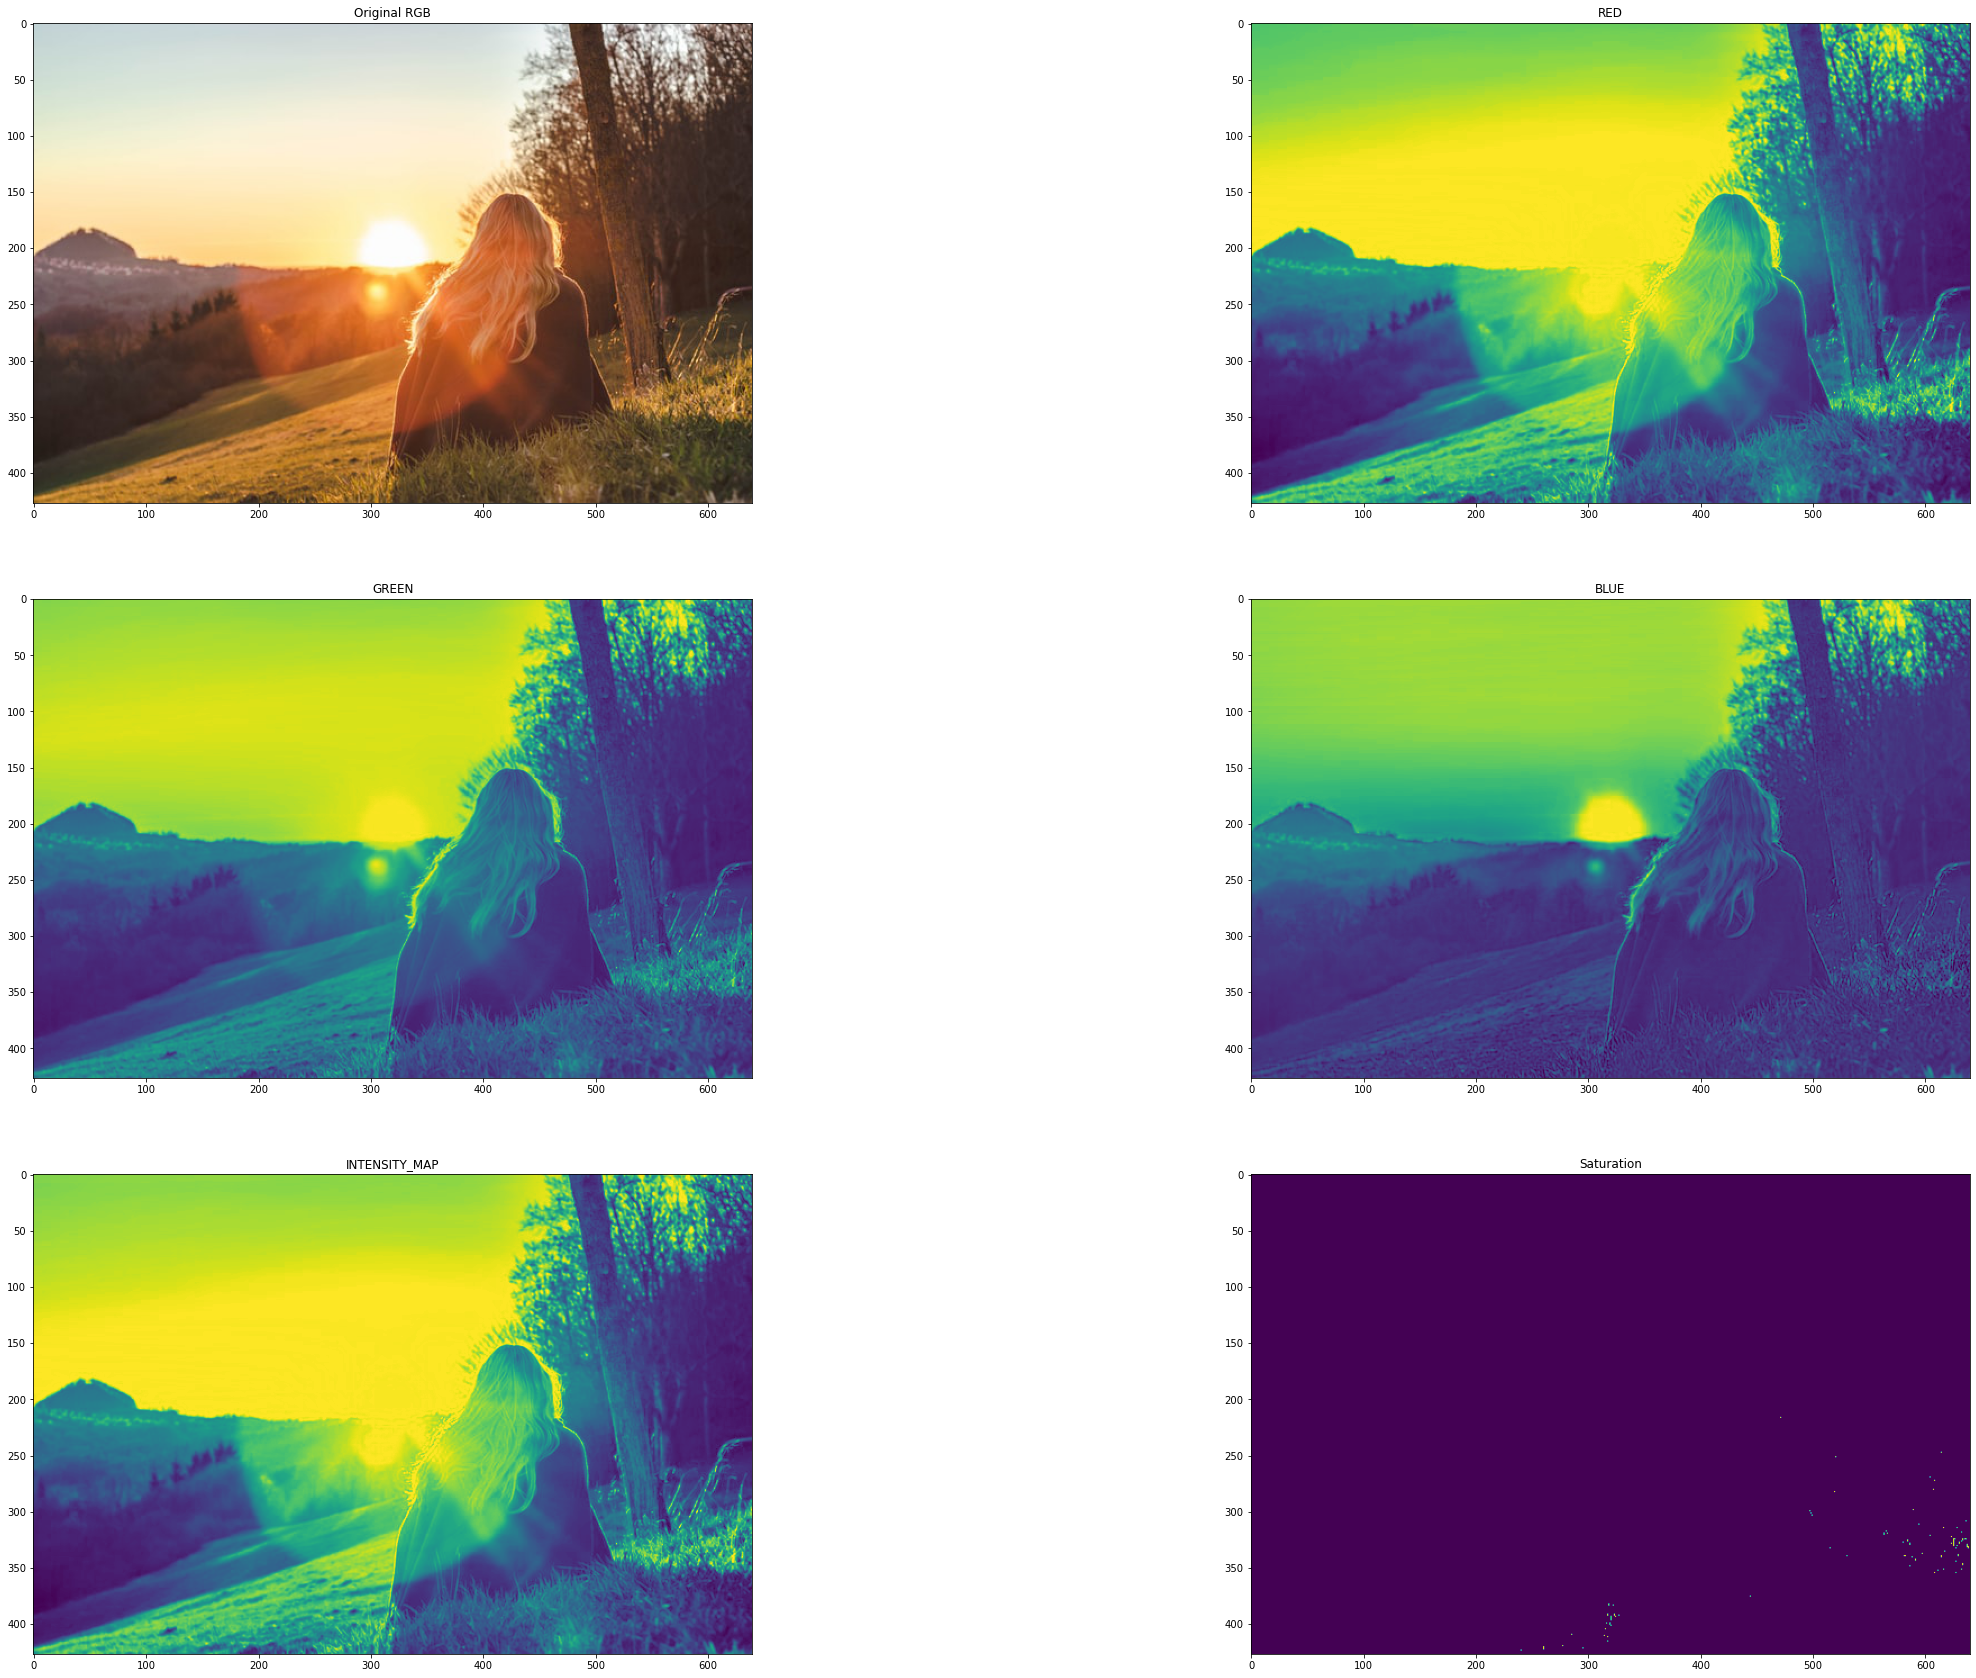

In [24]:
img_set = [rgb, R, G, B, intensity, saturation]
title_set = ['Original RGB', 'RED', 'GREEN', 'BLUE', 'INTENSITY_MAP', 'Saturation']
plot_img(img_set, title_set)

# HSV Image showing

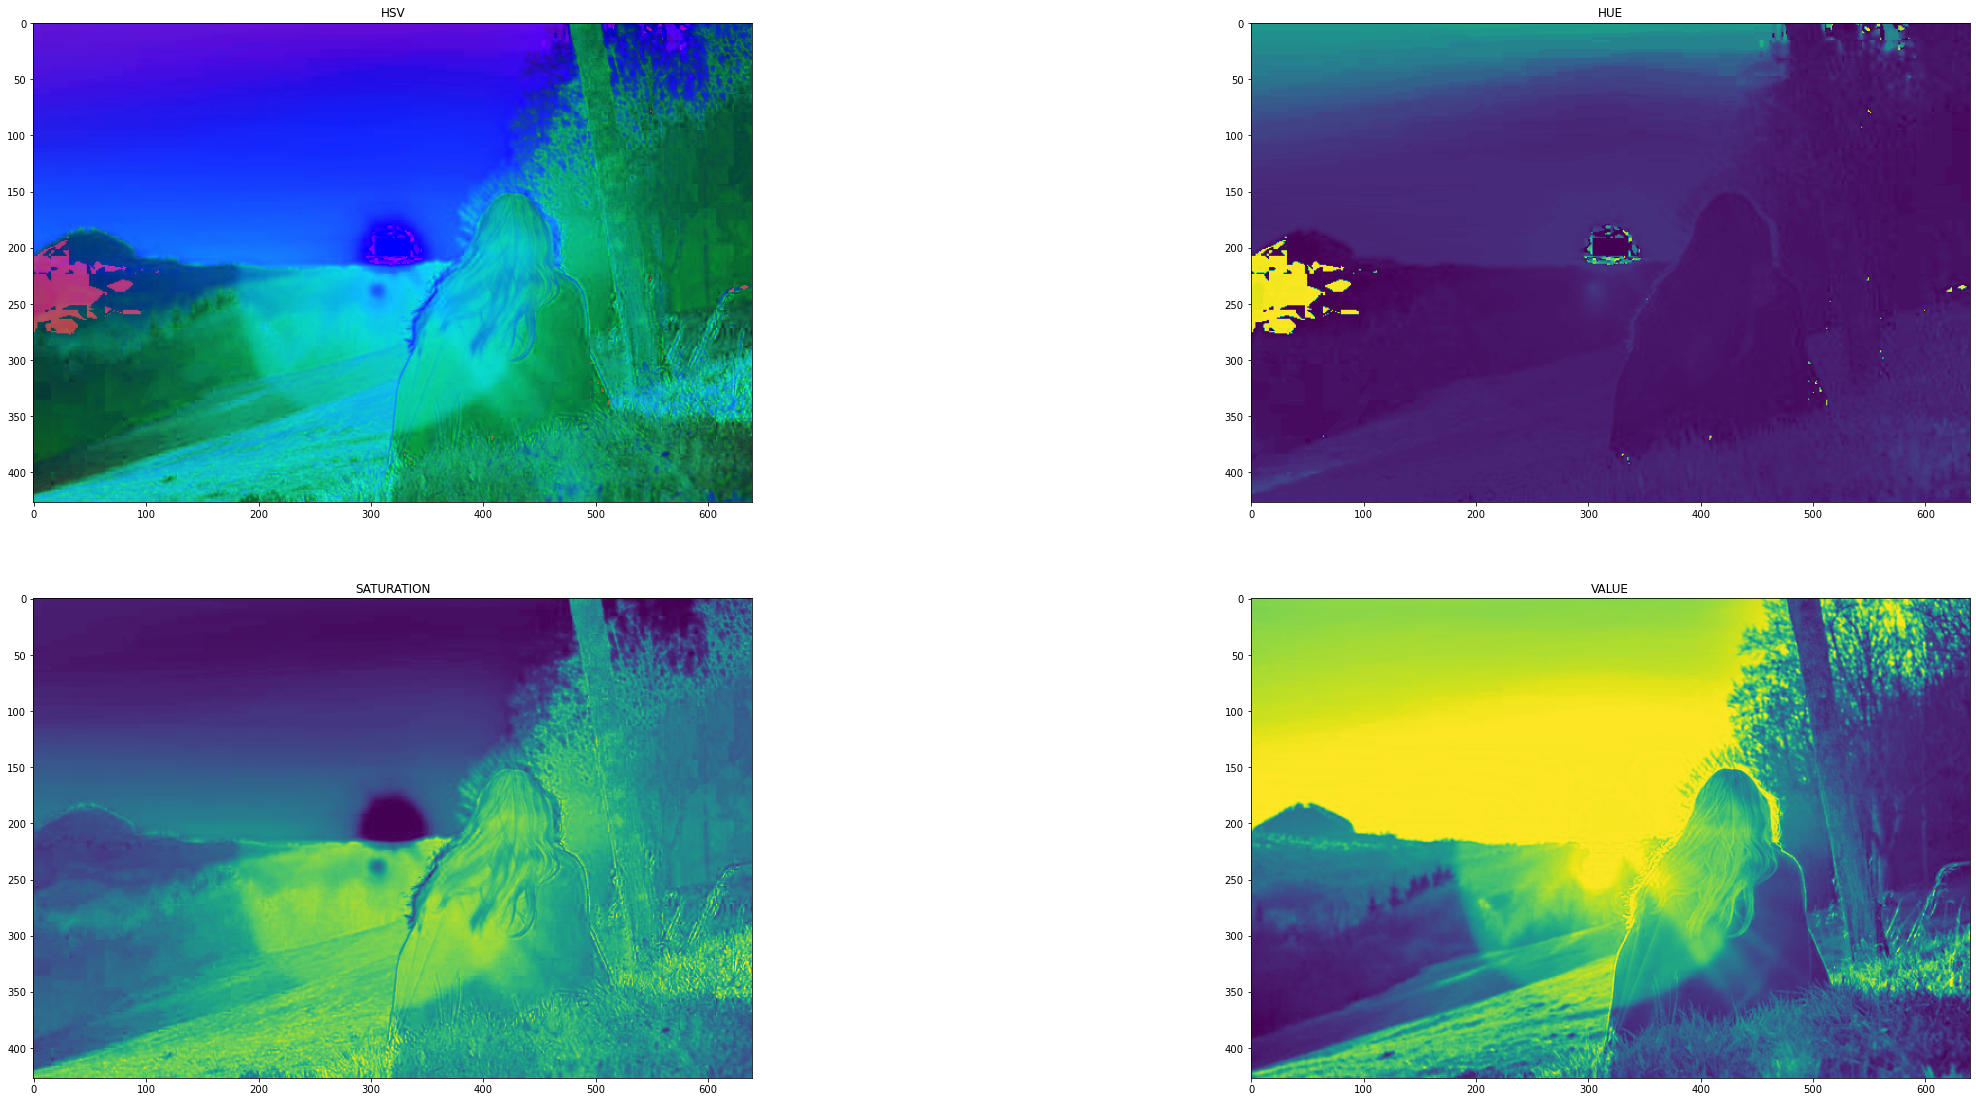

In [25]:
img_set = [hsv, H, S, V]
title_set = ['HSV', 'HUE', 'SATURATION', 'VALUE']
plot_img(img_set, title_set)

In [26]:
img_COLORMAP_HSV = cv2.applyColorMap(rgb, cv2.COLORMAP_HSV)

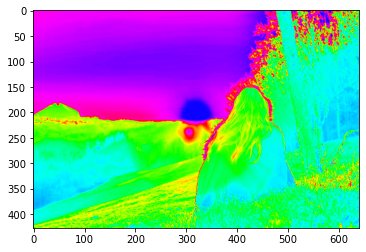

In [27]:
plt.imshow(img_COLORMAP_HSV)

In [20]:
img_COLORMAP_HSV.shape

(427, 640, 3)